# Time series analysis  (trend, slope, ... calculation) for JEDI-CUBES

This notebook was set up to help with the analysis of time series in jedi cubes. It can be connected directly to JEDI cubes and examine a time series contained there for various reference units (NUTS3,2,1,0, 1km, 10km, ....).
If you have any questions, please contact: loehnertz@space4environment.com

---------------------------------------------------------------------------------------------------------------------------------------


## (1) connection to jedi cube tables on MS-SQL (TEAL and  GREENMONKEY)
    !Please note: you need read and partially write permissions for the database to be used.!
        
<img src="./images/ms_sql_server_image.png" style="height: 600px;"/>

In [7]:
# Reading libaries and start a test-connection to different MS-SQL Server:
import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL
import json
#check processing time:##
import time  
import datetime
start_time = time.time()
##########################

#### TEAL
print ("----------------------------------------------------------------")
print ("connect to engine TEAL")
### reading psw and name:
with open(r"S:\Common workspace\ETC_DI\f07_JUPYTER_NOTEBOOKS\teal_account.txt") as f:  variables = json.load(f)
SERVERNAME =  (variables["server"])
USERNAME =  (variables["user"])
PSSWD =  (variables["psw"])
DRIVER = "ODBC Driver 17 for SQL Server"
#INSTANCENAME = "\SQLEXPRESS"
DB = "master"
#TABLE = "perftest"

engine_TEAL = sa.create_engine(
    f"mssql+pyodbc://{USERNAME}:{PSSWD}@{SERVERNAME}/{DB}?driver={DRIVER}", fast_executemany=True)       
#pd.set_option('display.max_rows', None)  ## display ALL ROWS -https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver
query_check=('''
    SELECT name AS DatabaseName,
    HAS_DBACCESS(name) AS HasDBAccess
    FROM sys.databases
    WHERE HAS_DBACCESS(name) = 1
    ''')  

readable_database = pd.read_sql(query_check, engine_TEAL)
print(readable_database)

print ("----------------------------------------------------------------")

print ("connect to engine GREENMONKEY")

engine_GREENMONKEY = sa.create_engine('mssql+pyodbc://' + "GREENMONKEY" + '/' + "tempdb" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

connection = engine_GREENMONKEY.raw_connection()
cursor = connection.cursor()

print ("connection to greenmonkey found")
print ("the function HAS_DBACCESS returns 1 if the user has access to the database, otherwise, it will return as 0")  

readable_database = pd.read_sql(query_check, engine_GREENMONKEY)
cursor.execute(query_check)
cursor.close()
connection.commit()
print ("following databases can be READ:")
#print (readable_database)
print ("----------------------------------------------------------------")




print ("end....")
print("--- %s seconds ---" % (time.time() - start_time))
seconds = time.time() - start_time
print('Time Taken: HH:MM:SS ', time.strftime("%H:%M:%S",time.gmtime(seconds)))

----------------------------------------------------------------
connect to engine TEAL
                  DatabaseName  HasDBAccess
0                  CubeManager            1
1              CubeManagerTest            1
2                  EPRTRmaster            1
3                  EPRTRpublic            1
4                HealthImpacts            1
5               JEDI_10KmTrial            1
6           JEDI_Adapt_EnvPerc            1
7             JEDI_adm2022test            1
8               JEDI_Admin_EDU            1
9           JEDI_Admin_FUA_EDU            1
10          JEDI_Admin_FUA_HCS            1
11              JEDI_Admin_HCS            1
12                JEDI_AGBflux            1
13               JEDI_AGBstock            1
14                JEDI_AGBtest            1
15         JEDI_AI_BioDiv_test            1
16                 JEDI_AirQNo            1
17               JEDI_Alp_Conv            1
18      JEDI_aq_admin_100_2021            1
19        JEDI_aq_adminman_100  

-------------------------------

## (2) Reading JEDI CUBE 

## (2.1) Reading drought impace F_tables from JEDI - TEAL server

In [ ]:
pd.options.display.max_rows = 10  ###https://pandas.pydata.org/docs/user_guide/options.html

In [8]:
## Reading TEAL database: drought
start_time = time.time()

print ("START...reading F_table on TEALS")

query_f_table=('''
   --Production of a C_table from a F_table 
-- by Manuel and a bit Eva :-)

---DROP TABLE IF EXISTS [ETC_ULS_Sandbox].[dbo].[C_DroughtImpact2022_assessment_version]

SELECT 
----   GridNum10km --- for 10km cell mapping
     ---- ,[GridNum] --- for validation
      [Admin]
      ,[Env]
      ,[CLC00]
      ,[CLC18]
      ,[CLC0018]
 
 ------SMA-05LINT0 area

 ------,SUM(IIF ([sma_gs_avg_2000] < -0.5 AND [LINT_anom_2000] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2000
 ------,SUM(IIF ([sma_gs_avg_2001] < -0.5 AND [LINT_anom_2001] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2001
 ------,SUM(IIF ([sma_gs_avg_2002] < -0.5 AND [LINT_anom_2002] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2002
 ------,SUM(IIF ([sma_gs_avg_2003] < -0.5 AND [LINT_anom_2003] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2003
 ------,SUM(IIF ([sma_gs_avg_2004] < -0.5 AND [LINT_anom_2004] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2004
 ------,SUM(IIF ([sma_gs_avg_2005] < -0.5 AND [LINT_anom_2005] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2005
 ------,SUM(IIF ([sma_gs_avg_2006] < -0.5 AND [LINT_anom_2006] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2006
 ------,SUM(IIF ([sma_gs_avg_2007] < -0.5 AND [LINT_anom_2007] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2007
------ ,SUM(IIF ([sma_gs_avg_2008] < -0.5 AND [LINT_anom_2008] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2008
------ ,SUM(IIF ([sma_gs_avg_2009] < -0.5 AND [LINT_anom_2009] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2009
 ------,SUM(IIF ([sma_gs_avg_2010] < -0.5 AND [LINT_anom_2010] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2010
 ------,SUM(IIF ([sma_gs_avg_2011] < -0.5 AND [LINT_anom_2011] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2011
 ------,SUM(IIF ([sma_gs_avg_2012] < -0.5 AND [LINT_anom_2012] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2012
 ------,SUM(IIF ([sma_gs_avg_2013] < -0.5 AND [LINT_anom_2013] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2013
 ------,SUM(IIF ([sma_gs_avg_2014] < -0.5 AND [LINT_anom_2014] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2014
 ------,SUM(IIF ([sma_gs_avg_2015] < -0.5 AND [LINT_anom_2015] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2015
 ------,SUM(IIF ([sma_gs_avg_2016] < -0.5 AND [LINT_anom_2016] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2016
 ------,SUM(IIF ([sma_gs_avg_2017] < -0.5 AND [LINT_anom_2017] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2017
 ------,SUM(IIF ([sma_gs_avg_2018] < -0.5 AND [LINT_anom_2018] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2018
 ------,SUM(IIF ([sma_gs_avg_2019] < -0.5 AND [LINT_anom_2019] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2019
 ------,SUM(IIF ([sma_gs_avg_2020] < -0.5 AND [LINT_anom_2020] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2020
 ------,SUM(IIF ([sma_gs_avg_2021] < -0.5 AND [LINT_anom_2021] <0 ,  [AreaHa]/100,   0 )) as SMA05LINT0Area_2021
 

 ------SMA-0.5LINT-0.5 area
 ------,SUM(IIF ([sma_gs_avg_2000] < -0.5 AND [LINT_anom_2000] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2000
 ------,SUM(IIF ([sma_gs_avg_2001] < -0.5 AND [LINT_anom_2001] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2001
 ------,SUM(IIF ([sma_gs_avg_2002] < -0.5 AND [LINT_anom_2002] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2002
 ------,SUM(IIF ([sma_gs_avg_2003] < -0.5 AND [LINT_anom_2003] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2003
 ------,SUM(IIF ([sma_gs_avg_2004] < -0.5 AND [LINT_anom_2004] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2004
 ------,SUM(IIF ([sma_gs_avg_2005] < -0.5 AND [LINT_anom_2005] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2005
 ------,SUM(IIF ([sma_gs_avg_2006] < -0.5 AND [LINT_anom_2006] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2006
 ------,SUM(IIF ([sma_gs_avg_2007] < -0.5 AND [LINT_anom_2007] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2007
 ------,SUM(IIF ([sma_gs_avg_2008] < -0.5 AND [LINT_anom_2008] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2008
 ------,SUM(IIF ([sma_gs_avg_2009] < -0.5 AND [LINT_anom_2009] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2009
 ------,SUM(IIF ([sma_gs_avg_2010] < -0.5 AND [LINT_anom_2010] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2010
 ------,SUM(IIF ([sma_gs_avg_2011] < -0.5 AND [LINT_anom_2011] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2011
 ------,SUM(IIF ([sma_gs_avg_2012] < -0.5 AND [LINT_anom_2012] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2012
 ------,SUM(IIF ([sma_gs_avg_2013] < -0.5 AND [LINT_anom_2013] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2013
 ------,SUM(IIF ([sma_gs_avg_2014] < -0.5 AND [LINT_anom_2014] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2014
 ------,SUM(IIF ([sma_gs_avg_2015] < -0.5 AND [LINT_anom_2015] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2015
 ------,SUM(IIF ([sma_gs_avg_2016] < -0.5 AND [LINT_anom_2016] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2016
 ------,SUM(IIF ([sma_gs_avg_2017] < -0.5 AND [LINT_anom_2017] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2017
 ------,SUM(IIF ([sma_gs_avg_2018] < -0.5 AND [LINT_anom_2018] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2018
 ------,SUM(IIF ([sma_gs_avg_2019] < -0.5 AND [LINT_anom_2019] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2019
 ------,SUM(IIF ([sma_gs_avg_2020] < -0.5 AND [LINT_anom_2020] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2020
 ------,SUM(IIF ([sma_gs_avg_2021] < -0.5 AND [LINT_anom_2021] <-0.5 ,  [AreaHa]/100,   0 )) as SMA05LINT05Area_2021


  ------SMA-0.5LINT-1 area
 ------,SUM(IIF ([sma_gs_avg_2000] < -0.5 AND [LINT_anom_2000] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2000
 ------,SUM(IIF ([sma_gs_avg_2001] < -0.5 AND [LINT_anom_2001] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2001
 ------,SUM(IIF ([sma_gs_avg_2002] < -0.5 AND [LINT_anom_2002] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2002
 ------,SUM(IIF ([sma_gs_avg_2003] < -0.5 AND [LINT_anom_2003] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2003
 ------,SUM(IIF ([sma_gs_avg_2004] < -0.5 AND [LINT_anom_2004] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2004
 ------,SUM(IIF ([sma_gs_avg_2005] < -0.5 AND [LINT_anom_2005] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2005
 ------,SUM(IIF ([sma_gs_avg_2006] < -0.5 AND [LINT_anom_2006] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2006
 ------,SUM(IIF ([sma_gs_avg_2007] < -0.5 AND [LINT_anom_2007] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2007
 ------,SUM(IIF ([sma_gs_avg_2008] < -0.5 AND [LINT_anom_2008] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2008
 ------,SUM(IIF ([sma_gs_avg_2009] < -0.5 AND [LINT_anom_2009] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2009
 ------,SUM(IIF ([sma_gs_avg_2010] < -0.5 AND [LINT_anom_2010] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2010
 ------,SUM(IIF ([sma_gs_avg_2011] < -0.5 AND [LINT_anom_2011] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2011
 ------,SUM(IIF ([sma_gs_avg_2012] < -0.5 AND [LINT_anom_2012] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2012
 ------,SUM(IIF ([sma_gs_avg_2013] < -0.5 AND [LINT_anom_2013] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2013
 ------,SUM(IIF ([sma_gs_avg_2014] < -0.5 AND [LINT_anom_2014] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2014
 ------,SUM(IIF ([sma_gs_avg_2015] < -0.5 AND [LINT_anom_2015] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2015
 ------,SUM(IIF ([sma_gs_avg_2016] < -0.5 AND [LINT_anom_2016] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2016
 ------,SUM(IIF ([sma_gs_avg_2017] < -0.5 AND [LINT_anom_2017] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2017
 ------,SUM(IIF ([sma_gs_avg_2018] < -0.5 AND [LINT_anom_2018] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2018
 ------,SUM(IIF ([sma_gs_avg_2019] < -0.5 AND [LINT_anom_2019] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2019
 ------,SUM(IIF ([sma_gs_avg_2020] < -0.5 AND [LINT_anom_2020] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2020
 ------,SUM(IIF ([sma_gs_avg_2021] < -0.5 AND [LINT_anom_2021] <-1 ,  [AreaHa]/100,   0 )) as SMA05LINT1Area_2021



------SMA-1LINT0 area

,SUM (IIF  ([sma_gs_avg_2000] < -1 AND [LINT_anom_2000] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2000
,SUM (IIF  ([sma_gs_avg_2001] < -1 AND [LINT_anom_2001] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2001
,SUM (IIF  ([sma_gs_avg_2002] < -1 AND [LINT_anom_2002] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2002
,SUM (IIF  ([sma_gs_avg_2003] < -1 AND [LINT_anom_2003] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2003
,SUM (IIF  ([sma_gs_avg_2004] < -1 AND [LINT_anom_2004] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2004
,SUM (IIF  ([sma_gs_avg_2005] < -1 AND [LINT_anom_2005] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2005
,SUM (IIF  ([sma_gs_avg_2006] < -1 AND [LINT_anom_2006] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2006
,SUM (IIF  ([sma_gs_avg_2007] < -1 AND [LINT_anom_2007] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2007
,SUM (IIF  ([sma_gs_avg_2008] < -1 AND [LINT_anom_2008] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2008
,SUM (IIF  ([sma_gs_avg_2009] < -1 AND [LINT_anom_2009] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2009
,SUM (IIF  ([sma_gs_avg_2010] < -1 AND [LINT_anom_2010] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2010
,SUM (IIF  ([sma_gs_avg_2011] < -1 AND [LINT_anom_2011] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2011
,SUM (IIF  ([sma_gs_avg_2012] < -1 AND [LINT_anom_2012] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2012
,SUM (IIF  ([sma_gs_avg_2013] < -1 AND [LINT_anom_2013] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2013
,SUM (IIF  ([sma_gs_avg_2014] < -1 AND [LINT_anom_2014] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2014
,SUM (IIF  ([sma_gs_avg_2015] < -1 AND [LINT_anom_2015] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2015
,SUM (IIF  ([sma_gs_avg_2016] < -1 AND [LINT_anom_2016] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2016
,SUM (IIF  ([sma_gs_avg_2017] < -1 AND [LINT_anom_2017] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2017
,SUM (IIF  ([sma_gs_avg_2018] < -1 AND [LINT_anom_2018] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2018
,SUM (IIF  ([sma_gs_avg_2019] < -1 AND [LINT_anom_2019] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2019
,SUM (IIF  ([sma_gs_avg_2020] < -1 AND [LINT_anom_2020] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2020
,SUM (IIF  ([sma_gs_avg_2021] < -1 AND [LINT_anom_2021] <0 ,   [AreaHa]/100,   0 )) as SMA1LINT0Area_2021



------SMA-1LINT-05 area
,SUM (IIF  ([sma_gs_avg_2000] < -1 AND [LINT_anom_2000] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2000
,SUM (IIF  ([sma_gs_avg_2001] < -1 AND [LINT_anom_2001] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2001
,SUM (IIF  ([sma_gs_avg_2002] < -1 AND [LINT_anom_2002] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2002
,SUM (IIF  ([sma_gs_avg_2003] < -1 AND [LINT_anom_2003] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2003
,SUM (IIF  ([sma_gs_avg_2004] < -1 AND [LINT_anom_2004] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2004
,SUM (IIF  ([sma_gs_avg_2005] < -1 AND [LINT_anom_2005] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2005
,SUM (IIF  ([sma_gs_avg_2006] < -1 AND [LINT_anom_2006] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2006
,SUM (IIF  ([sma_gs_avg_2007] < -1 AND [LINT_anom_2007] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2007
,SUM (IIF  ([sma_gs_avg_2008] < -1 AND [LINT_anom_2008] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2008
,SUM (IIF  ([sma_gs_avg_2009] < -1 AND [LINT_anom_2009] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2009
,SUM (IIF  ([sma_gs_avg_2010] < -1 AND [LINT_anom_2010] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2010
,SUM (IIF  ([sma_gs_avg_2011] < -1 AND [LINT_anom_2011] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2011
,SUM (IIF  ([sma_gs_avg_2012] < -1 AND [LINT_anom_2012] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2012
,SUM (IIF  ([sma_gs_avg_2013] < -1 AND [LINT_anom_2013] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2013
,SUM (IIF  ([sma_gs_avg_2014] < -1 AND [LINT_anom_2014] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2014
,SUM (IIF  ([sma_gs_avg_2015] < -1 AND [LINT_anom_2015] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2015
,SUM (IIF  ([sma_gs_avg_2016] < -1 AND [LINT_anom_2016] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2016
,SUM (IIF  ([sma_gs_avg_2017] < -1 AND [LINT_anom_2017] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2017
,SUM (IIF  ([sma_gs_avg_2018] < -1 AND [LINT_anom_2018] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2018
,SUM (IIF  ([sma_gs_avg_2019] < -1 AND [LINT_anom_2019] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2019
,SUM (IIF  ([sma_gs_avg_2020] < -1 AND [LINT_anom_2020] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2020
,SUM (IIF  ([sma_gs_avg_2021] < -1 AND [LINT_anom_2021] <-0.5 ,   [AreaHa]/100,   0 )) as SMA1LINT05Area_2021

------SMA-1LINT-1 area
 ,SUM(IIF ([sma_gs_avg_2000] < -1 AND [LINT_anom_2000] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2000
 ,SUM(IIF ([sma_gs_avg_2001] < -1 AND [LINT_anom_2001] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2001
 ,SUM(IIF ([sma_gs_avg_2002] < -1 AND [LINT_anom_2002] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2002
 ,SUM(IIF ([sma_gs_avg_2003] < -1 AND [LINT_anom_2003] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2003
 ,SUM(IIF ([sma_gs_avg_2004] < -1 AND [LINT_anom_2004] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2004
 ,SUM(IIF ([sma_gs_avg_2005] < -1 AND [LINT_anom_2005] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2005
 ,SUM(IIF ([sma_gs_avg_2006] < -1 AND [LINT_anom_2006] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2006
 ,SUM(IIF ([sma_gs_avg_2007] < -1 AND [LINT_anom_2007] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2007
 ,SUM(IIF ([sma_gs_avg_2008] < -1 AND [LINT_anom_2008] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2008
 ,SUM(IIF ([sma_gs_avg_2009] < -1 AND [LINT_anom_2009] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2009
 ,SUM(IIF ([sma_gs_avg_2010] < -1 AND [LINT_anom_2010] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2010
 ,SUM(IIF ([sma_gs_avg_2011] < -1 AND [LINT_anom_2011] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2011
 ,SUM(IIF ([sma_gs_avg_2012] < -1 AND [LINT_anom_2012] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2012
 ,SUM(IIF ([sma_gs_avg_2013] < -1 AND [LINT_anom_2013] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2013
 ,SUM(IIF ([sma_gs_avg_2014] < -1 AND [LINT_anom_2014] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2014
 ,SUM(IIF ([sma_gs_avg_2015] < -1 AND [LINT_anom_2015] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2015
 ,SUM(IIF ([sma_gs_avg_2016] < -1 AND [LINT_anom_2016] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2016
 ,SUM(IIF ([sma_gs_avg_2017] < -1 AND [LINT_anom_2017] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2017
 ,SUM(IIF ([sma_gs_avg_2018] < -1 AND [LINT_anom_2018] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2018
 ,SUM(IIF ([sma_gs_avg_2019] < -1 AND [LINT_anom_2019] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2019
 ,SUM(IIF ([sma_gs_avg_2020] < -1 AND [LINT_anom_2020] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2020
 ,SUM(IIF ([sma_gs_avg_2021] < -1 AND [LINT_anom_2021] <-1 ,  [AreaHa]/100,   0 )) as SMA1LINT1Area_2021


 ------SMA-05 area
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2000
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2001
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2002
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2003
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2004
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2005
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2006
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2007
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2008
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2009
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2010
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2011
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2012
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2013
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2014
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2015
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2016
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2017
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2018
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2019
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2020
 ------,SUM(IIF ([sma_gs_avg_] < -0.5, [AreaHa]/100,   0 )) as SMA05Area_2021

  ------SMA-1 area
 ,SUM(IIF ([sma_gs_avg_2000] < -1, [AreaHa]/100,   0 )) as SMA1Area_2000
 ,SUM(IIF ([sma_gs_avg_2001] < -1, [AreaHa]/100,   0 )) as SMA1Area_2001
 ,SUM(IIF ([sma_gs_avg_2002] < -1, [AreaHa]/100,   0 )) as SMA1Area_2002
 ,SUM(IIF ([sma_gs_avg_2003] < -1, [AreaHa]/100,   0 )) as SMA1Area_2003
 ,SUM(IIF ([sma_gs_avg_2004] < -1, [AreaHa]/100,   0 )) as SMA1Area_2004
 ,SUM(IIF ([sma_gs_avg_2005] < -1, [AreaHa]/100,   0 )) as SMA1Area_2005
 ,SUM(IIF ([sma_gs_avg_2006] < -1, [AreaHa]/100,   0 )) as SMA1Area_2006
 ,SUM(IIF ([sma_gs_avg_2007] < -1, [AreaHa]/100,   0 )) as SMA1Area_2007
 ,SUM(IIF ([sma_gs_avg_2008] < -1, [AreaHa]/100,   0 )) as SMA1Area_2008
 ,SUM(IIF ([sma_gs_avg_2009] < -1, [AreaHa]/100,   0 )) as SMA1Area_2009
 ,SUM(IIF ([sma_gs_avg_2010] < -1, [AreaHa]/100,   0 )) as SMA1Area_2010
 ,SUM(IIF ([sma_gs_avg_2011] < -1, [AreaHa]/100,   0 )) as SMA1Area_2011
 ,SUM(IIF ([sma_gs_avg_2012] < -1, [AreaHa]/100,   0 )) as SMA1Area_2012
 ,SUM(IIF ([sma_gs_avg_2013] < -1, [AreaHa]/100,   0 )) as SMA1Area_2013
 ,SUM(IIF ([sma_gs_avg_2014] < -1, [AreaHa]/100,   0 )) as SMA1Area_2014
 ,SUM(IIF ([sma_gs_avg_2015] < -1, [AreaHa]/100,   0 )) as SMA1Area_2015
 ,SUM(IIF ([sma_gs_avg_2016] < -1, [AreaHa]/100,   0 )) as SMA1Area_2016
 ,SUM(IIF ([sma_gs_avg_2017] < -1, [AreaHa]/100,   0 )) as SMA1Area_2017
 ,SUM(IIF ([sma_gs_avg_2018] < -1, [AreaHa]/100,   0 )) as SMA1Area_2018
 ,SUM(IIF ([sma_gs_avg_2019] < -1, [AreaHa]/100,   0 )) as SMA1Area_2019
 ,SUM(IIF ([sma_gs_avg_2020] < -1, [AreaHa]/100,   0 )) as SMA1Area_2020
 ,SUM(IIF ([sma_gs_avg_2021] < -1, [AreaHa]/100,   0 )) as SMA1Area_2021


 ------SMA-1LINT0 updated 2

----old:  ,AVG(IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <0 , [LINT_anom_2000], NULL)) as  SMA1LINT0_2000
--old  ,SUM (IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <0 , [LINT_anom_2000] *[AreaHa], NULL)) /sum([AreaHa])  as  SMA1LINT0_2000
 ,SUM (IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <0 , [LINT_anom_2000] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2000
 ,SUM (IIF(  [sma_gs_avg_2001]<-1 AND [LINT_anom_2001] <0 , [LINT_anom_2001] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2001]<-1 AND [LINT_anom_2001] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2001
 ,SUM (IIF(  [sma_gs_avg_2002]<-1 AND [LINT_anom_2002] <0 , [LINT_anom_2002] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2002]<-1 AND [LINT_anom_2002] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2002
 ,SUM (IIF(  [sma_gs_avg_2003]<-1 AND [LINT_anom_2003] <0 , [LINT_anom_2003] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2003]<-1 AND [LINT_anom_2003] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2003
 ,SUM (IIF(  [sma_gs_avg_2004]<-1 AND [LINT_anom_2004] <0 , [LINT_anom_2004] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2004]<-1 AND [LINT_anom_2004] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2004
 ,SUM (IIF(  [sma_gs_avg_2005]<-1 AND [LINT_anom_2005] <0 , [LINT_anom_2005] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2005]<-1 AND [LINT_anom_2005] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2005
 ,SUM (IIF(  [sma_gs_avg_2006]<-1 AND [LINT_anom_2006] <0 , [LINT_anom_2006] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2006]<-1 AND [LINT_anom_2006] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2006
 ,SUM (IIF(  [sma_gs_avg_2007]<-1 AND [LINT_anom_2007] <0 , [LINT_anom_2007] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2007]<-1 AND [LINT_anom_2007] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2007
 ,SUM (IIF(  [sma_gs_avg_2008]<-1 AND [LINT_anom_2008] <0 , [LINT_anom_2008] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2008]<-1 AND [LINT_anom_2008] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2008
 ,SUM (IIF(  [sma_gs_avg_2009]<-1 AND [LINT_anom_2009] <0 , [LINT_anom_2009] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2009]<-1 AND [LINT_anom_2009] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2009
 ,SUM (IIF(  [sma_gs_avg_2010]<-1 AND [LINT_anom_2010] <0 , [LINT_anom_2010] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2010]<-1 AND [LINT_anom_2010] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2010
 ,SUM (IIF(  [sma_gs_avg_2011]<-1 AND [LINT_anom_2011] <0 , [LINT_anom_2011] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2011]<-1 AND [LINT_anom_2011] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2011
 ,SUM (IIF(  [sma_gs_avg_2012]<-1 AND [LINT_anom_2012] <0 , [LINT_anom_2012] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2012]<-1 AND [LINT_anom_2012] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2012
 ,SUM (IIF(  [sma_gs_avg_2013]<-1 AND [LINT_anom_2013] <0 , [LINT_anom_2013] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2013]<-1 AND [LINT_anom_2013] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2013
 ,SUM (IIF(  [sma_gs_avg_2014]<-1 AND [LINT_anom_2014] <0 , [LINT_anom_2014] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2014]<-1 AND [LINT_anom_2014] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2014
 ,SUM (IIF(  [sma_gs_avg_2015]<-1 AND [LINT_anom_2015] <0 , [LINT_anom_2015] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2015]<-1 AND [LINT_anom_2015] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2015
 ,SUM (IIF(  [sma_gs_avg_2016]<-1 AND [LINT_anom_2016] <0 , [LINT_anom_2016] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2016]<-1 AND [LINT_anom_2016] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2016
 ,SUM (IIF(  [sma_gs_avg_2017]<-1 AND [LINT_anom_2017] <0 , [LINT_anom_2017] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2017]<-1 AND [LINT_anom_2017] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2017
 ,SUM (IIF(  [sma_gs_avg_2018]<-1 AND [LINT_anom_2018] <0 , [LINT_anom_2018] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2018]<-1 AND [LINT_anom_2018] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2018
 ,SUM (IIF(  [sma_gs_avg_2019]<-1 AND [LINT_anom_2019] <0 , [LINT_anom_2019] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2019]<-1 AND [LINT_anom_2019] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2019
 ,SUM (IIF(  [sma_gs_avg_2020]<-1 AND [LINT_anom_2020] <0 , [LINT_anom_2020] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2020]<-1 AND [LINT_anom_2020] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2020
 ,SUM (IIF(  [sma_gs_avg_2021]<-1 AND [LINT_anom_2021] <0 , [LINT_anom_2021] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2021]<-1 AND [LINT_anom_2021] <0 ,  [AreaHa], 0))  as  SMA1LINT0_2021



 ------SMA-1LINT-05 update 2
----,AVG(IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <-0.5 , [LINT_anom_2000], NULL)) as  SMA1LINT05_2000
--- ,SUM (IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000]  <-0.5 , [LINT_anom_2000] *[AreaHa], NULL)) /sum([AreaHa])  as  SMA1LINT05_2000
 ,SUM (IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <-0.5 , [LINT_anom_2000] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2000
 ,SUM (IIF(  [sma_gs_avg_2001]<-1 AND [LINT_anom_2001] <-0.5 , [LINT_anom_2001] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2001]<-1 AND [LINT_anom_2001] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2001
 ,SUM (IIF(  [sma_gs_avg_2002]<-1 AND [LINT_anom_2002] <-0.5 , [LINT_anom_2002] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2002]<-1 AND [LINT_anom_2002] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2002
 ,SUM (IIF(  [sma_gs_avg_2003]<-1 AND [LINT_anom_2003] <-0.5 , [LINT_anom_2003] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2003]<-1 AND [LINT_anom_2003] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2003
 ,SUM (IIF(  [sma_gs_avg_2004]<-1 AND [LINT_anom_2004] <-0.5 , [LINT_anom_2004] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2004]<-1 AND [LINT_anom_2004] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2004
 ,SUM (IIF(  [sma_gs_avg_2005]<-1 AND [LINT_anom_2005] <-0.5 , [LINT_anom_2005] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2005]<-1 AND [LINT_anom_2005] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2005
 ,SUM (IIF(  [sma_gs_avg_2006]<-1 AND [LINT_anom_2006] <-0.5 , [LINT_anom_2006] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2006]<-1 AND [LINT_anom_2006] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2006
 ,SUM (IIF(  [sma_gs_avg_2007]<-1 AND [LINT_anom_2007] <-0.5 , [LINT_anom_2007] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2007]<-1 AND [LINT_anom_2007] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2007
 ,SUM (IIF(  [sma_gs_avg_2008]<-1 AND [LINT_anom_2008] <-0.5 , [LINT_anom_2008] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2008]<-1 AND [LINT_anom_2008] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2008
 ,SUM (IIF(  [sma_gs_avg_2009]<-1 AND [LINT_anom_2009] <-0.5 , [LINT_anom_2009] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2009]<-1 AND [LINT_anom_2009] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2009
 ,SUM (IIF(  [sma_gs_avg_2010]<-1 AND [LINT_anom_2010] <-0.5 , [LINT_anom_2010] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2010]<-1 AND [LINT_anom_2010] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2010
 ,SUM (IIF(  [sma_gs_avg_2011]<-1 AND [LINT_anom_2011] <-0.5 , [LINT_anom_2011] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2011]<-1 AND [LINT_anom_2011] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2011
 ,SUM (IIF(  [sma_gs_avg_2012]<-1 AND [LINT_anom_2012] <-0.5 , [LINT_anom_2012] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2012]<-1 AND [LINT_anom_2012] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2012
 ,SUM (IIF(  [sma_gs_avg_2013]<-1 AND [LINT_anom_2013] <-0.5 , [LINT_anom_2013] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2013]<-1 AND [LINT_anom_2013] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2013
 ,SUM (IIF(  [sma_gs_avg_2014]<-1 AND [LINT_anom_2014] <-0.5 , [LINT_anom_2014] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2014]<-1 AND [LINT_anom_2014] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2014
 ,SUM (IIF(  [sma_gs_avg_2015]<-1 AND [LINT_anom_2015] <-0.5 , [LINT_anom_2015] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2015]<-1 AND [LINT_anom_2015] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2015
 ,SUM (IIF(  [sma_gs_avg_2016]<-1 AND [LINT_anom_2016] <-0.5 , [LINT_anom_2016] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2016]<-1 AND [LINT_anom_2016] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2016
 ,SUM (IIF(  [sma_gs_avg_2017]<-1 AND [LINT_anom_2017] <-0.5 , [LINT_anom_2017] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2017]<-1 AND [LINT_anom_2017] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2017
 ,SUM (IIF(  [sma_gs_avg_2018]<-1 AND [LINT_anom_2018] <-0.5 , [LINT_anom_2018] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2018]<-1 AND [LINT_anom_2018] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2018
 ,SUM (IIF(  [sma_gs_avg_2019]<-1 AND [LINT_anom_2019] <-0.5 , [LINT_anom_2019] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2019]<-1 AND [LINT_anom_2019] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2019
 ,SUM (IIF(  [sma_gs_avg_2020]<-1 AND [LINT_anom_2020] <-0.5 , [LINT_anom_2020] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2020]<-1 AND [LINT_anom_2020] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2020
 ,SUM (IIF(  [sma_gs_avg_2021]<-1 AND [LINT_anom_2021] <-0.5 , [LINT_anom_2021] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2021]<-1 AND [LINT_anom_2021] <-0.5,  [AreaHa], 0))  as  SMA1LINT05_2021







 ------SMA-1LINT-1 update 2
--,AVG(IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <-1 , [LINT_anom_2000], NULL)) as  SMA1LINT1_2000
 ---,SUM (IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000]  <-1, [LINT_anom_2000] *[AreaHa], NULL)) /sum([AreaHa])  as  SMA1LINT1_2000
 ,SUM (IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <-1 , [LINT_anom_2000] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2000]<-1 AND [LINT_anom_2000] <-1,  [AreaHa], 0))  as  SMA1LINT1_2000
 ,SUM (IIF(  [sma_gs_avg_2001]<-1 AND [LINT_anom_2001] <-1 , [LINT_anom_2001] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2001]<-1 AND [LINT_anom_2001] <-1,  [AreaHa], 0))  as  SMA1LINT1_2001
 ,SUM (IIF(  [sma_gs_avg_2002]<-1 AND [LINT_anom_2002] <-1 , [LINT_anom_2002] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2002]<-1 AND [LINT_anom_2002] <-1,  [AreaHa], 0))  as  SMA1LINT1_2002
 ,SUM (IIF(  [sma_gs_avg_2003]<-1 AND [LINT_anom_2003] <-1 , [LINT_anom_2003] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2003]<-1 AND [LINT_anom_2003] <-1,  [AreaHa], 0))  as  SMA1LINT1_2003
 ,SUM (IIF(  [sma_gs_avg_2004]<-1 AND [LINT_anom_2004] <-1 , [LINT_anom_2004] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2004]<-1 AND [LINT_anom_2004] <-1,  [AreaHa], 0))  as  SMA1LINT1_2004
 ,SUM (IIF(  [sma_gs_avg_2005]<-1 AND [LINT_anom_2005] <-1 , [LINT_anom_2005] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2005]<-1 AND [LINT_anom_2005] <-1,  [AreaHa], 0))  as  SMA1LINT1_2005
 ,SUM (IIF(  [sma_gs_avg_2006]<-1 AND [LINT_anom_2006] <-1 , [LINT_anom_2006] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2006]<-1 AND [LINT_anom_2006] <-1,  [AreaHa], 0))  as  SMA1LINT1_2006
 ,SUM (IIF(  [sma_gs_avg_2007]<-1 AND [LINT_anom_2007] <-1 , [LINT_anom_2007] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2007]<-1 AND [LINT_anom_2007] <-1,  [AreaHa], 0))  as  SMA1LINT1_2007
 ,SUM (IIF(  [sma_gs_avg_2008]<-1 AND [LINT_anom_2008] <-1 , [LINT_anom_2008] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2008]<-1 AND [LINT_anom_2008] <-1,  [AreaHa], 0))  as  SMA1LINT1_2008
 ,SUM (IIF(  [sma_gs_avg_2009]<-1 AND [LINT_anom_2009] <-1 , [LINT_anom_2009] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2009]<-1 AND [LINT_anom_2009] <-1,  [AreaHa], 0))  as  SMA1LINT1_2009
 ,SUM (IIF(  [sma_gs_avg_2010]<-1 AND [LINT_anom_2010] <-1 , [LINT_anom_2010] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2010]<-1 AND [LINT_anom_2010] <-1,  [AreaHa], 0))  as  SMA1LINT1_2010
 ,SUM (IIF(  [sma_gs_avg_2011]<-1 AND [LINT_anom_2011] <-1 , [LINT_anom_2011] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2011]<-1 AND [LINT_anom_2011] <-1,  [AreaHa], 0))  as  SMA1LINT1_2011
 ,SUM (IIF(  [sma_gs_avg_2012]<-1 AND [LINT_anom_2012] <-1 , [LINT_anom_2012] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2012]<-1 AND [LINT_anom_2012] <-1,  [AreaHa], 0))  as  SMA1LINT1_2012
 ,SUM (IIF(  [sma_gs_avg_2013]<-1 AND [LINT_anom_2013] <-1 , [LINT_anom_2013] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2013]<-1 AND [LINT_anom_2013] <-1,  [AreaHa], 0))  as  SMA1LINT1_2013
 ,SUM (IIF(  [sma_gs_avg_2014]<-1 AND [LINT_anom_2014] <-1 , [LINT_anom_2014] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2014]<-1 AND [LINT_anom_2014] <-1,  [AreaHa], 0))  as  SMA1LINT1_2014
 ,SUM (IIF(  [sma_gs_avg_2015]<-1 AND [LINT_anom_2015] <-1 , [LINT_anom_2015] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2015]<-1 AND [LINT_anom_2015] <-1,  [AreaHa], 0))  as  SMA1LINT1_2015
 ,SUM (IIF(  [sma_gs_avg_2016]<-1 AND [LINT_anom_2016] <-1 , [LINT_anom_2016] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2016]<-1 AND [LINT_anom_2016] <-1,  [AreaHa], 0))  as  SMA1LINT1_2016
 ,SUM (IIF(  [sma_gs_avg_2017]<-1 AND [LINT_anom_2017] <-1 , [LINT_anom_2017] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2017]<-1 AND [LINT_anom_2017] <-1,  [AreaHa], 0))  as  SMA1LINT1_2017
 ,SUM (IIF(  [sma_gs_avg_2018]<-1 AND [LINT_anom_2018] <-1 , [LINT_anom_2018] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2018]<-1 AND [LINT_anom_2018] <-1,  [AreaHa], 0))  as  SMA1LINT1_2018
 ,SUM (IIF(  [sma_gs_avg_2019]<-1 AND [LINT_anom_2019] <-1 , [LINT_anom_2019] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2019]<-1 AND [LINT_anom_2019] <-1,  [AreaHa], 0))  as  SMA1LINT1_2019
 ,SUM (IIF(  [sma_gs_avg_2020]<-1 AND [LINT_anom_2020] <-1 , [LINT_anom_2020] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2020]<-1 AND [LINT_anom_2020] <-1,  [AreaHa], 0))  as  SMA1LINT1_2020
 ,SUM (IIF(  [sma_gs_avg_2021]<-1 AND [LINT_anom_2021] <-1 , [LINT_anom_2021] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2021]<-1 AND [LINT_anom_2021] <-1,  [AreaHa], 0))  as  SMA1LINT1_2021






------ SMA-1 avg update 2 
---,AVG(IIF(  [sma_gs_avg_2000]<-1, [sma_gs_avg_2000], NULL)) as  SMA1_2000
-- ,SUM (IIF(  [sma_gs_avg_2000]<-1  , [sma_gs_avg_2000] *[AreaHa], NULL)) /sum([AreaHa])  as  SMA1_2000
  ,SUM (IIF(  [sma_gs_avg_2000]<-1  , [sma_gs_avg_2000] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2000]<-1 ,  [AreaHa], 0)) as  SMA1_2000
 ,SUM (IIF(  [sma_gs_avg_2001]<-1  , [sma_gs_avg_2001] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2001]<-1 ,  [AreaHa], 0)) as  SMA1_2001
 ,SUM (IIF(  [sma_gs_avg_2002]<-1  , [sma_gs_avg_2002] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2002]<-1 ,  [AreaHa], 0)) as  SMA1_2002
 ,SUM (IIF(  [sma_gs_avg_2003]<-1  , [sma_gs_avg_2003] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2003]<-1 ,  [AreaHa], 0)) as  SMA1_2003
 ,SUM (IIF(  [sma_gs_avg_2004]<-1  , [sma_gs_avg_2004] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2004]<-1 ,  [AreaHa], 0)) as  SMA1_2004
 ,SUM (IIF(  [sma_gs_avg_2005]<-1  , [sma_gs_avg_2005] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2005]<-1 ,  [AreaHa], 0)) as  SMA1_2005
 ,SUM (IIF(  [sma_gs_avg_2006]<-1  , [sma_gs_avg_2006] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2006]<-1 ,  [AreaHa], 0)) as  SMA1_2006
 ,SUM (IIF(  [sma_gs_avg_2007]<-1  , [sma_gs_avg_2007] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2007]<-1 ,  [AreaHa], 0)) as  SMA1_2007
 ,SUM (IIF(  [sma_gs_avg_2008]<-1  , [sma_gs_avg_2008] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2008]<-1 ,  [AreaHa], 0)) as  SMA1_2008
 ,SUM (IIF(  [sma_gs_avg_2009]<-1  , [sma_gs_avg_2009] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2009]<-1 ,  [AreaHa], 0)) as  SMA1_2009
 ,SUM (IIF(  [sma_gs_avg_2010]<-1  , [sma_gs_avg_2010] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2010]<-1 ,  [AreaHa], 0)) as  SMA1_2010
 ,SUM (IIF(  [sma_gs_avg_2011]<-1  , [sma_gs_avg_2011] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2011]<-1 ,  [AreaHa], 0)) as  SMA1_2011
 ,SUM (IIF(  [sma_gs_avg_2012]<-1  , [sma_gs_avg_2012] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2012]<-1 ,  [AreaHa], 0)) as  SMA1_2012
 ,SUM (IIF(  [sma_gs_avg_2013]<-1  , [sma_gs_avg_2013] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2013]<-1 ,  [AreaHa], 0)) as  SMA1_2013
 ,SUM (IIF(  [sma_gs_avg_2014]<-1  , [sma_gs_avg_2014] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2014]<-1 ,  [AreaHa], 0)) as  SMA1_2014
 ,SUM (IIF(  [sma_gs_avg_2015]<-1  , [sma_gs_avg_2015] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2015]<-1 ,  [AreaHa], 0)) as  SMA1_2015
 ,SUM (IIF(  [sma_gs_avg_2016]<-1  , [sma_gs_avg_2016] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2016]<-1 ,  [AreaHa], 0)) as  SMA1_2016
 ,SUM (IIF(  [sma_gs_avg_2017]<-1  , [sma_gs_avg_2017] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2017]<-1 ,  [AreaHa], 0)) as  SMA1_2017
 ,SUM (IIF(  [sma_gs_avg_2018]<-1  , [sma_gs_avg_2018] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2018]<-1 ,  [AreaHa], 0)) as  SMA1_2018
 ,SUM (IIF(  [sma_gs_avg_2019]<-1  , [sma_gs_avg_2019] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2019]<-1 ,  [AreaHa], 0)) as  SMA1_2019
 ,SUM (IIF(  [sma_gs_avg_2020]<-1  , [sma_gs_avg_2020] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2020]<-1 ,  [AreaHa], 0)) as  SMA1_2020
 ,SUM (IIF(  [sma_gs_avg_2021]<-1  , [sma_gs_avg_2021] *[AreaHa], NULL)) /sum(IIF(  [sma_gs_avg_2021]<-1 ,  [AreaHa], 0)) as  SMA1_2021

 
------ LINT avg

 ,SUM(      [LINT_anom_2000]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2000]
 ,SUM(      [LINT_anom_2001]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2001]
 ,SUM(      [LINT_anom_2002]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2002]
 ,SUM(      [LINT_anom_2003]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2003]
 ,SUM(      [LINT_anom_2004]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2004]
 ,SUM(      [LINT_anom_2005]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2005]
 ,SUM(      [LINT_anom_2006]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2006]
 ,SUM(      [LINT_anom_2007]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2007]
 ,SUM(      [LINT_anom_2008]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2008]
 ,SUM(      [LINT_anom_2009]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2009]
 ,SUM(      [LINT_anom_2010]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2010]
 ,SUM(      [LINT_anom_2011]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2011]
 ,SUM(      [LINT_anom_2012]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2012]
 ,SUM(      [LINT_anom_2013]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2013]
 ,SUM(      [LINT_anom_2014]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2014]
 ,SUM(      [LINT_anom_2015]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2015]
 ,SUM(      [LINT_anom_2016]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2016]
 ,SUM(      [LINT_anom_2017]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2017]
 ,SUM(      [LINT_anom_2018]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2018]
 ,SUM(      [LINT_anom_2019]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2019]
 ,SUM(      [LINT_anom_2020]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2020]
 ,SUM(      [LINT_anom_2021]*[AreaHa])/sum([AreaHa]) as       [LINT_anom_2021]


 ------ SMA avg
 ,SUM(      [sma_gs_avg_2000]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2000]
 ,SUM(      [sma_gs_avg_2001]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2001]
 ,SUM(      [sma_gs_avg_2002]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2002]
 ,SUM(      [sma_gs_avg_2003]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2003]
 ,SUM(      [sma_gs_avg_2004]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2004]
 ,SUM(      [sma_gs_avg_2005]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2005]
 ,SUM(      [sma_gs_avg_2006]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2006]
 ,SUM(      [sma_gs_avg_2007]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2007]
 ,SUM(      [sma_gs_avg_2008]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2008]
 ,SUM(      [sma_gs_avg_2009]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2009]
 ,SUM(      [sma_gs_avg_2010]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2010]
 ,SUM(      [sma_gs_avg_2011]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2011]
 ,SUM(      [sma_gs_avg_2012]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2012]
 ,SUM(      [sma_gs_avg_2013]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2013]
 ,SUM(      [sma_gs_avg_2014]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2014]
 ,SUM(      [sma_gs_avg_2015]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2015]
 ,SUM(      [sma_gs_avg_2016]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2016]
 ,SUM(      [sma_gs_avg_2017]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2017]
 ,SUM(      [sma_gs_avg_2018]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2018]
 ,SUM(      [sma_gs_avg_2019]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2019]
 ,SUM(      [sma_gs_avg_2020]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2020]
 ,SUM(      [sma_gs_avg_2021]*[AreaHa])/sum([AreaHa]) as       [sma_gs_avg_2021]

 ,SUM([AreaHa]) as [AreaHa]

---INTO  [ETC_ULS_Sandbox].[dbo].[C_DroughtImpact2022_assessment_version_v2]

FROM JEDI_DroughtImpact2022.[dbo].[F_DroughtImpact2022]
 where [Admin] is not NULL
 group by 
    [Admin],[Env],[CLC00],[CLC18],[CLC0018]

    ''')  

readable_database = pd.read_sql(query_f_table, engine_TEAL)  ##reading table into data-frame df


print ("job done")


print("--- %s seconds ---" % (time.time() - start_time))
seconds = time.time() - start_time
print('Time Taken: HH:MM:SS ', time.strftime("%H:%M:%S",time.gmtime(seconds)))
print ("end....")

START...reading F_table on TEALS
job done
--- 787.7235133647919 seconds ---
Time Taken: HH:MM:SS  00:13:07
end....


## (3) Export the transformed table (group) from TEAL to GREENMONKEY




In [13]:
#exporting data to GREENMONKEY
import time
import datetime
start_time = time.time()
current_start_time = datetime.datetime.now()
print ("START time at greenwich:", current_start_time)
############################################################################
print ("connect to engine GREENMONKEY")  #drought
engine_GREENMONKEY = sa.create_engine('mssql+pyodbc://' + "GREENMONKEY" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')
name_of_table ="C_DroughtImpact2022_assessment_version_v1"       
print ("connect to greenmonkey engine.....GREENMONKEY and store sql table")  
readable_database.to_sql(name_of_table, engine_GREENMONKEY, if_exists='replace', index = False, schema='drought')






print ("end....")
print("--- %s seconds ---" % (time.time() - start_time))
seconds = time.time() - start_time
print('Time Taken: HH:MM:SS ', time.strftime("%H:%M:%S",time.gmtime(seconds)))

START time at greenwich: 2023-03-31 14:42:48.518757
connect to engine GREENMONKEY
connect to greenmonkey engine.....GREENMONKEY and store sql table
end....
--- 240.91339635849 seconds ---
Time Taken: HH:MM:SS  00:04:00


In [18]:
pd.options.display.max_rows = 10

readable_database
my_list = readable_database.columns.values.tolist()
print (my_list)


'''['Admin', 'Env', 'CLC00', 'CLC18', 'CLC0018', 

'SMA1LINT0Area_2000', 'SMA1LINT0Area_2001', 'SMA1LINT0Area_2002', 'SMA1LINT0Area_2003', 'SMA1LINT0Area_2004', 'SMA1LINT0Area_2005', 'SMA1LINT0Area_2006', 'SMA1LINT0Area_2007', 'SMA1LINT0Area_2008', 'SMA1LINT0Area_2009', 'SMA1LINT0Area_2010', 'SMA1LINT0Area_2011', 'SMA1LINT0Area_2012', 'SMA1LINT0Area_2013', 'SMA1LINT0Area_2014', 'SMA1LINT0Area_2015', 'SMA1LINT0Area_2016', 'SMA1LINT0Area_2017', 'SMA1LINT0Area_2018', 'SMA1LINT0Area_2019', 'SMA1LINT0Area_2020', 'SMA1LINT0Area_2021',


 'SMA1LINT05Area_2000', 'SMA1LINT05Area_2001', 'SMA1LINT05Area_2002', 'SMA1LINT05Area_2003', 'SMA1LINT05Area_2004', 'SMA1LINT05Area_2005', 'SMA1LINT05Area_2006', 'SMA1LINT05Area_2007', 'SMA1LINT05Area_2008', 'SMA1LINT05Area_2009', 'SMA1LINT05Area_2010', 'SMA1LINT05Area_2011', 'SMA1LINT05Area_2012', 'SMA1LINT05Area_2013', 'SMA1LINT05Area_2014', 'SMA1LINT05Area_2015', 'SMA1LINT05Area_2016', 'SMA1LINT05Area_2017', 'SMA1LINT05Area_2018', 'SMA1LINT05Area_2019', 'SMA1LINT05Area_2020', 'SMA1LINT05Area_2021', 
 
 'SMA1LINT1Area_2000', 'SMA1LINT1Area_2001', 'SMA1LINT1Area_2002', 'SMA1LINT1Area_2003', 'SMA1LINT1Area_2004', 'SMA1LINT1Area_2005', 'SMA1LINT1Area_2006', 'SMA1LINT1Area_2007', 'SMA1LINT1Area_2008', 'SMA1LINT1Area_2009', 'SMA1LINT1Area_2010', 'SMA1LINT1Area_2011', 'SMA1LINT1Area_2012', 'SMA1LINT1Area_2013', 'SMA1LINT1Area_2014', 'SMA1LINT1Area_2015', 'SMA1LINT1Area_2016', 'SMA1LINT1Area_2017', 'SMA1LINT1Area_2018', 'SMA1LINT1Area_2019', 'SMA1LINT1Area_2020', 'SMA1LINT1Area_2021',

 'SMA1Area_2000', 'SMA1Area_2001', 'SMA1Area_2002', 'SMA1Area_2003', 'SMA1Area_2004', 'SMA1Area_2005', 'SMA1Area_2006', 'SMA1Area_2007', 'SMA1Area_2008', 'SMA1Area_2009', 'SMA1Area_2010', 'SMA1Area_2011', 'SMA1Area_2012', 'SMA1Area_2013', 'SMA1Area_2014', 'SMA1Area_2015', 'SMA1Area_2016', 'SMA1Area_2017', 'SMA1Area_2018', 'SMA1Area_2019', 'SMA1Area_2020', 'SMA1Area_2021',

 'SMA1LINT0_2000', 'SMA1LINT0_2001', 'SMA1LINT0_2002', 'SMA1LINT0_2003', 'SMA1LINT0_2004', 'SMA1LINT0_2005', 'SMA1LINT0_2006', 'SMA1LINT0_2007', 'SMA1LINT0_2008', 'SMA1LINT0_2009', 'SMA1LINT0_2010', 'SMA1LINT0_2011', 'SMA1LINT0_2012', 'SMA1LINT0_2013', 'SMA1LINT0_2014', 'SMA1LINT0_2015', 'SMA1LINT0_2016', 'SMA1LINT0_2017', 'SMA1LINT0_2018', 'SMA1LINT0_2019', 'SMA1LINT0_2020', 'SMA1LINT0_2021',


 'SMA1LINT05_2000', 'SMA1LINT05_2001', 'SMA1LINT05_2002', 'SMA1LINT05_2003', 'SMA1LINT05_2004', 'SMA1LINT05_2005', 'SMA1LINT05_2006', 'SMA1LINT05_2007', 'SMA1LINT05_2008', 'SMA1LINT05_2009', 'SMA1LINT05_2010', 'SMA1LINT05_2011', 'SMA1LINT05_2012', 'SMA1LINT05_2013', 'SMA1LINT05_2014', 'SMA1LINT05_2015', 'SMA1LINT05_2016', 'SMA1LINT05_2017', 'SMA1LINT05_2018', 'SMA1LINT05_2019', 'SMA1LINT05_2020', 'SMA1LINT05_2021',

 'SMA1LINT1_2000', 'SMA1LINT1_2001', 'SMA1LINT1_2002', 'SMA1LINT1_2003', 'SMA1LINT1_2004', 'SMA1LINT1_2005', 'SMA1LINT1_2006', 'SMA1LINT1_2007', 'SMA1LINT1_2008', 'SMA1LINT1_2009', 'SMA1LINT1_2010', 'SMA1LINT1_2011', 'SMA1LINT1_2012', 'SMA1LINT1_2013', 'SMA1LINT1_2014', 'SMA1LINT1_2015', 'SMA1LINT1_2016', 'SMA1LINT1_2017', 'SMA1LINT1_2018', 'SMA1LINT1_2019', 'SMA1LINT1_2020', 'SMA1LINT1_2021', 
 
 'SMA1_2000', 'SMA1_2001', 'SMA1_2002', 'SMA1_2003', 'SMA1_2004', 'SMA1_2005', 'SMA1_2006', 'SMA1_2007', 'SMA1_2008', 'SMA1_2009', 'SMA1_2010', 'SMA1_2011', 'SMA1_2012', 'SMA1_2013', 'SMA1_2014', 'SMA1_2015', 'SMA1_2016', 'SMA1_2017', 'SMA1_2018', 'SMA1_2019', 'SMA1_2020', 'SMA1_2021',

 'LINT_anom_2000', 'LINT_anom_2001', 'LINT_anom_2002', 'LINT_anom_2003', 'LINT_anom_2004', 'LINT_anom_2005', 'LINT_anom_2006', 'LINT_anom_2007', 'LINT_anom_2008', 'LINT_anom_2009', 'LINT_anom_2010', 'LINT_anom_2011', 'LINT_anom_2012', 'LINT_anom_2013', 'LINT_anom_2014', 'LINT_anom_2015', 'LINT_anom_2016', 'LINT_anom_2017', 'LINT_anom_2018', 'LINT_anom_2019', 'LINT_anom_2020', 'LINT_anom_2021', 
 
 
 'sma_gs_avg_2000', 'sma_gs_avg_2001', 'sma_gs_avg_2002', 'sma_gs_avg_2003', 'sma_gs_avg_2004', 'sma_gs_avg_2005', 'sma_gs_avg_2006', 'sma_gs_avg_2007', 'sma_gs_avg_2008', 'sma_gs_avg_2009', 'sma_gs_avg_2010', 'sma_gs_avg_2011', 'sma_gs_avg_2012', 'sma_gs_avg_2013', 'sma_gs_avg_2014', 'sma_gs_avg_2015', 'sma_gs_avg_2016', 'sma_gs_avg_2017', 'sma_gs_avg_2018', 'sma_gs_avg_2019', 'sma_gs_avg_2020', 'sma_gs_avg_2021',




 'AreaHa']'''

['Admin', 'Env', 'CLC00', 'CLC18', 'CLC0018', 'SMA1LINT0Area_2000', 'SMA1LINT0Area_2001', 'SMA1LINT0Area_2002', 'SMA1LINT0Area_2003', 'SMA1LINT0Area_2004', 'SMA1LINT0Area_2005', 'SMA1LINT0Area_2006', 'SMA1LINT0Area_2007', 'SMA1LINT0Area_2008', 'SMA1LINT0Area_2009', 'SMA1LINT0Area_2010', 'SMA1LINT0Area_2011', 'SMA1LINT0Area_2012', 'SMA1LINT0Area_2013', 'SMA1LINT0Area_2014', 'SMA1LINT0Area_2015', 'SMA1LINT0Area_2016', 'SMA1LINT0Area_2017', 'SMA1LINT0Area_2018', 'SMA1LINT0Area_2019', 'SMA1LINT0Area_2020', 'SMA1LINT0Area_2021', 'SMA1LINT05Area_2000', 'SMA1LINT05Area_2001', 'SMA1LINT05Area_2002', 'SMA1LINT05Area_2003', 'SMA1LINT05Area_2004', 'SMA1LINT05Area_2005', 'SMA1LINT05Area_2006', 'SMA1LINT05Area_2007', 'SMA1LINT05Area_2008', 'SMA1LINT05Area_2009', 'SMA1LINT05Area_2010', 'SMA1LINT05Area_2011', 'SMA1LINT05Area_2012', 'SMA1LINT05Area_2013', 'SMA1LINT05Area_2014', 'SMA1LINT05Area_2015', 'SMA1LINT05Area_2016', 'SMA1LINT05Area_2017', 'SMA1LINT05Area_2018', 'SMA1LINT05Area_2019', 'SMA1LINT0

In [48]:
## Transform table

##SMA1LINT0Area_2019
print ("SMA-1 LINT-05 Area")
start_time = time.time()
current_start_time = datetime.datetime.now()
print ("START time at greenwich:", current_start_time)
sql_sma1_lint05_area = (
'''SELECT [Admin], Env, CLC00, CLC18, CLC0018, 
 SMA1LINT05Area_2000, SMA1LINT05Area_2001, SMA1LINT05Area_2002, SMA1LINT05Area_2003, 
 SMA1LINT05Area_2004, SMA1LINT05Area_2005, SMA1LINT05Area_2006, SMA1LINT05Area_2007, SMA1LINT05Area_2008,
 SMA1LINT05Area_2009, SMA1LINT05Area_2010, SMA1LINT05Area_2011, SMA1LINT05Area_2012, SMA1LINT05Area_2013, 
 SMA1LINT05Area_2014, SMA1LINT05Area_2015, SMA1LINT05Area_2016, SMA1LINT05Area_2017, SMA1LINT05Area_2018,
 SMA1LINT05Area_2019, SMA1LINT05Area_2020, SMA1LINT05Area_2021, 
 AreaHa
  FROM [Climate_Impact].[drought].[C_DroughtImpact2022_assessment_version_v1]
  ''')


readable_sql = pd.read_sql(sql_sma1_lint05_area, engine_GREENMONKEY)  ##reading table into data-frame df


print ("job done")

df_transformed =readable_sql.melt(id_vars=['Admin', 'Env', 'CLC00', 'CLC18', 'CLC0018','AreaHa'], 
     var_name="fire_parameter_and_year", 
        value_name="drought_area")


##Convert the Strings to Datetime in the DataFrame
count_row = df_transformed.shape[0]  # Gives number of rows
count_col = df_transformed.shape[1]  # Gives number of columns

print ('number of rows: ' + str(count_row))
print ('number of columns: ' + str(count_col))


##cleaning the table
df_transformed['yeart'] = df_transformed['fire_parameter_and_year'].str[-4:]
df_transformed['year'] = df_transformed['yeart'].astype(int)
df_transformed.drop(['yeart'], axis=1)
#df_transformed['year'] = pd.to_datetime(df_transformed['year'], format='%Y')


print ("done")

print("--- %s seconds ---" % (time.time() - start_time))
seconds = time.time() - start_time
print('Time Taken: HH:MM:SS ', time.strftime("%H:%M:%S",time.gmtime(seconds)))
print ("end....")


SMA-1 LINT-05 Area
START time at greenwich: 2023-03-31 16:27:50.995466
job done
number of rows: 2727406
number of columns: 8
done
--- 9.50835371017456 seconds ---
Time Taken: HH:MM:SS  00:00:09
end....


In [49]:

df_transformed


,Admin,Env,CLC00,CLC18,CLC0018,AreaHa,fire_parameter_and_year,drought_area,yeart,year
0,0,MDS,242.0,242.0,242242.0,94.0,SMA1LINT05Area_2000,0.77,2000,2000
1,0,MDS,323.0,323.0,323323.0,725.0,SMA1LINT05Area_2000,3.53,2000,2000
2,1,MAC,222.0,222.0,222222.0,46.0,SMA1LINT05Area_2000,0.00,2000,2000
3,3,LUS,112.0,112.0,112112.0,29.0,SMA1LINT05Area_2000,0.00,2000,2000
4,3,LUS,324.0,324.0,324324.0,2.0,SMA1LINT05Area_2000,0.00,2000,2000
...,...,...,...,...,...,...,...,...,...,...
2727401,1604,NEM,324.0,211.0,324211.0,58.0,SMA1LINT05Area_2021,0.00,2021,2021
2727402,1605,ATN,124.0,142.0,124142.0,48.0,SMA1LINT05Area_2021,0.00,2021,2021
2727403,1605,ATN,211.0,131.0,211131.0,5.0,SMA1LINT05Area_2021,0.00,2021,2021
2727404,1605,ATN,312.0,312.0,312312.0,2537.0,SMA1LINT05Area_2021,2.51,2021,2021


## (4) Calc trend



In [64]:
import time
import datetime
start_time = time.time()
current_start_time = datetime.datetime.now()
print ("START time at greenwich:", current_start_time)

#https://stackoverflow.com/questions/71031226/calculating-trend-per-customer-level-in-python-dataframe



df = df_transformed


def trendline(x, y, order=1):
    return np.polyfit(x, y, order)[-2]

#x= df.groupby(['Env','Admin']).apply(lambda subdf: trendline(subdf['year'].values, subdf['AreaHa'].values))

x= df.groupby(['Env']).apply(lambda subdf: trendline(subdf['year'].values, subdf['drought_area'].values))


print ("end....")
print("--- %s seconds ---" % (time.time() - start_time))
seconds = time.time() - start_time
print('Time Taken: HH:MM:SS ', time.strftime("%H:%M:%S",time.gmtime(seconds)))

START time at greenwich: 2023-03-31 16:44:13.702083
end....
--- 7.680523157119751 seconds ---
Time Taken: HH:MM:SS  00:00:07


In [85]:
 df_group = df.groupby(["Env","year"])["drought_area"].sum().reset_index()
    

In [91]:
df_group

,Env,year,drought_area
0,ALN,2000,4.00
1,ALN,2001,75.43
2,ALN,2002,2939.87
3,ALN,2003,3128.63
4,ALN,2004,34.49
...,...,...,...
325,PAN,2017,9386.00
326,PAN,2018,253.00
327,PAN,2019,1945.08
328,PAN,2020,29606.67


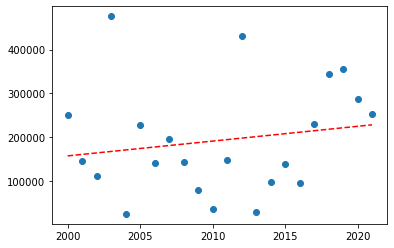

In [96]:
df_group_Year = df_group.groupby(["year"])["drought_area"].sum().reset_index()


y= df_group_Year['drought_area']
x =df_group_Year['year']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()